# Clause and Contract Text Investigation

This workbook caries out some simple preliminary exploratory analysis in to the clauses and the text of the Governing Law and Audit Rights Clauses

## Section 1: Download Data & Extract Clause Of Interest


This uses a customized class (DownloadCUAD) to download the CUAD data and extract the required data to the working memory.


In [1]:
#Import required packages for section
from DownloadCUAD import DownloadCUAD
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RichardWarburton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Download CUAD Data to local drive
DC = DownloadCUAD()
DC.setup()

CUAD data already downloaded & extracted!


In [3]:
#Extract data from CUAD
clause_data,raw_data = DC.extract_contracts()

#Concatenate string where there are multiple annotations.
contracts_GL,combined_annotations_GL = DC.extract_clause('Governing Law',True)
contracts_AR,combined_annotations_AR = DC.extract_clause('Audit Rights',True)

There are 437 contracts (85.69%) with 'Governing Law' annotations
There are 25 contracts with more than one annotation
There are 214 contracts (41.96%) with 'Audit Rights' annotations
There are 136 contracts with more than one annotation


In [4]:
#Initate clause list defult dict
clause_list = defaultdict(list)

for i in range(len(clause_data['contract title'])):
    clause_list[clause_data['contract title'][i]].append(clause_data['clause'][i])

#Defnine function to obtian len of list/array elememnts
length_fn = lambda array : list(map(len,array))

#Determine lenght of clause lists and respective annotations.
clause_lens = length_fn(clause_list.values())
AR_lens = length_fn(combined_annotations_AR)
GL_lens = length_fn(combined_annotations_GL)

## Section 2: Summary Analysis

Analysis of character length of clause text and clauses annotated within contracts.

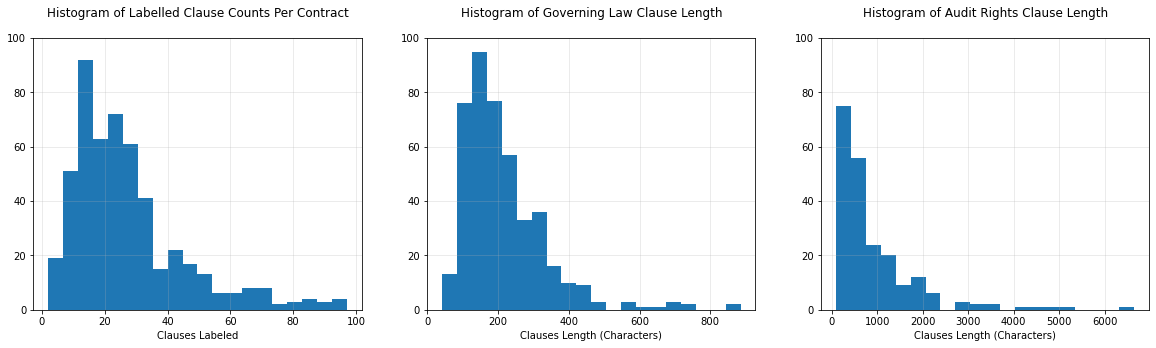

In [5]:
#Plot histograms of clause counts and character lenghts
fig,axs = plt.subplots(1,3,figsize = (20,5))

#Plot clause coutns
axs[0].hist(clause_lens,bins = 20)
axs[0].set_xlabel('Clauses Labeled')
axs[0].set_title('Histogram of Labelled Clause Counts Per Contract\n')
axs[0].set_ylim([0,100])
axs[0].grid(alpha=0.3)

#plot governing law character lengths
axs[1].hist(GL_lens,bins = 20)
axs[1].set_xlabel('Clauses Length (Characters)')
axs[1].set_title('Histogram of Governing Law Clause Length\n')
axs[1].set_ylim([0,100])
axs[1].grid(alpha=0.3)

#Plot Audit Rights character lenghts
axs[2].hist(AR_lens,bins = 20)
axs[2].set_xlabel('Clauses Length (Characters)')
axs[2].set_title('Histogram of Audit Rights Clause Length\n')
axs[2].set_ylim([0,100])
axs[2].grid(alpha=0.3)

#Output and save plot
plt.savefig('Fig2.png',bbox_inches='tight')
plt.show()

In [6]:
def print_sum(arr,txt=''):
    """Function to print mean and Var of an array (arr)"""
    if txt != '':
        print(txt+':\n')
        
    print('Mean:\t {2:.2f}'.format(*stats.describe(arr)))
    print('Var:\t {3:.2f}'.format(*stats.describe(arr)))

In [7]:
#Output summary statistics for plots
print_sum(clause_lens,txt='Clauses per contract')
print_sum(GL_lens,txt='\nGoverning Law Character Length')
print_sum(AR_lens,txt='\nAudit Rights Character Length')

Clauses per contract:

Mean:	 27.10
Var:	 328.36

Governing Law Character Length:

Mean:	 215.82
Var:	 14548.13

Audit Rights Character Length:

Mean:	 914.00
Var:	 917079.76


## Example of the Elbow Method Selection

The following is a constructed example used to demonstrate the 'Elbow' method of selecting the clusters K in a KMeans algorithm.

In [8]:
#Initate hypothetical array examples
vals = [700,300,100,90,77,71,60,59,55,52,51]
k_r = np.arange(1,len(vals)+1)

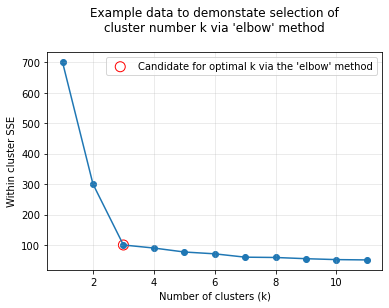

In [9]:
#Plot
plt.plot(k_r,vals)
plt.scatter(k_r,vals)
plt.scatter(3,100,s=100, facecolors='none', edgecolors='r',label ='Candidate for optimal k via the \'elbow\' method')
plt.grid(alpha=0.3)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within cluster SSE')
plt.title('Example data to demonstate selection of\ncluster number k via \'elbow\' method\n')
plt.legend()
plt.savefig('Fig3.png')
plt.show()